💪 An End to End Multicalss Dog Breed Classfication
This notebook builds end to end multiclass image classfier using tensor flow and tensor flwo hub


Problem : Identify a breed of dog given an image. Say i take a photo of the dog  the machine should be able to identify the breed of the dog

Data : We are grabbing data from kaagles Dog breed identification Identification
https://www.kaggle.com/competitions/dog-breed-identification/data

Evaluation
 It should be a file with prediction probablities of each dog breed of each test image

Features : Some informaton about the data . We are dealing with the images (unstructured data ) , hence its best we use deep / transfer learning. There are 120 breeds of dogs, so 120 different classes
10222 labels ,
10222 different types of dog images in training set and 10K + in test set.
These images have no labels, we need to map the labels to the correct images.



In [3]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [4]:
import tensorflow_hub as hub
hub.__version__

'0.16.1'

In [5]:
print("Available" if tf.config.list_physical_devices("GPU") else "not available")

Available


In [6]:
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/dog vision/labels.csv")

In [7]:
#Accessing our data
labels_csv.head()
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,fff43b07992508bc822f33d8ffd902ae,scottish_deerhound
freq,1,126


Turning our images into tensors (numerical representation)

<Axes: >

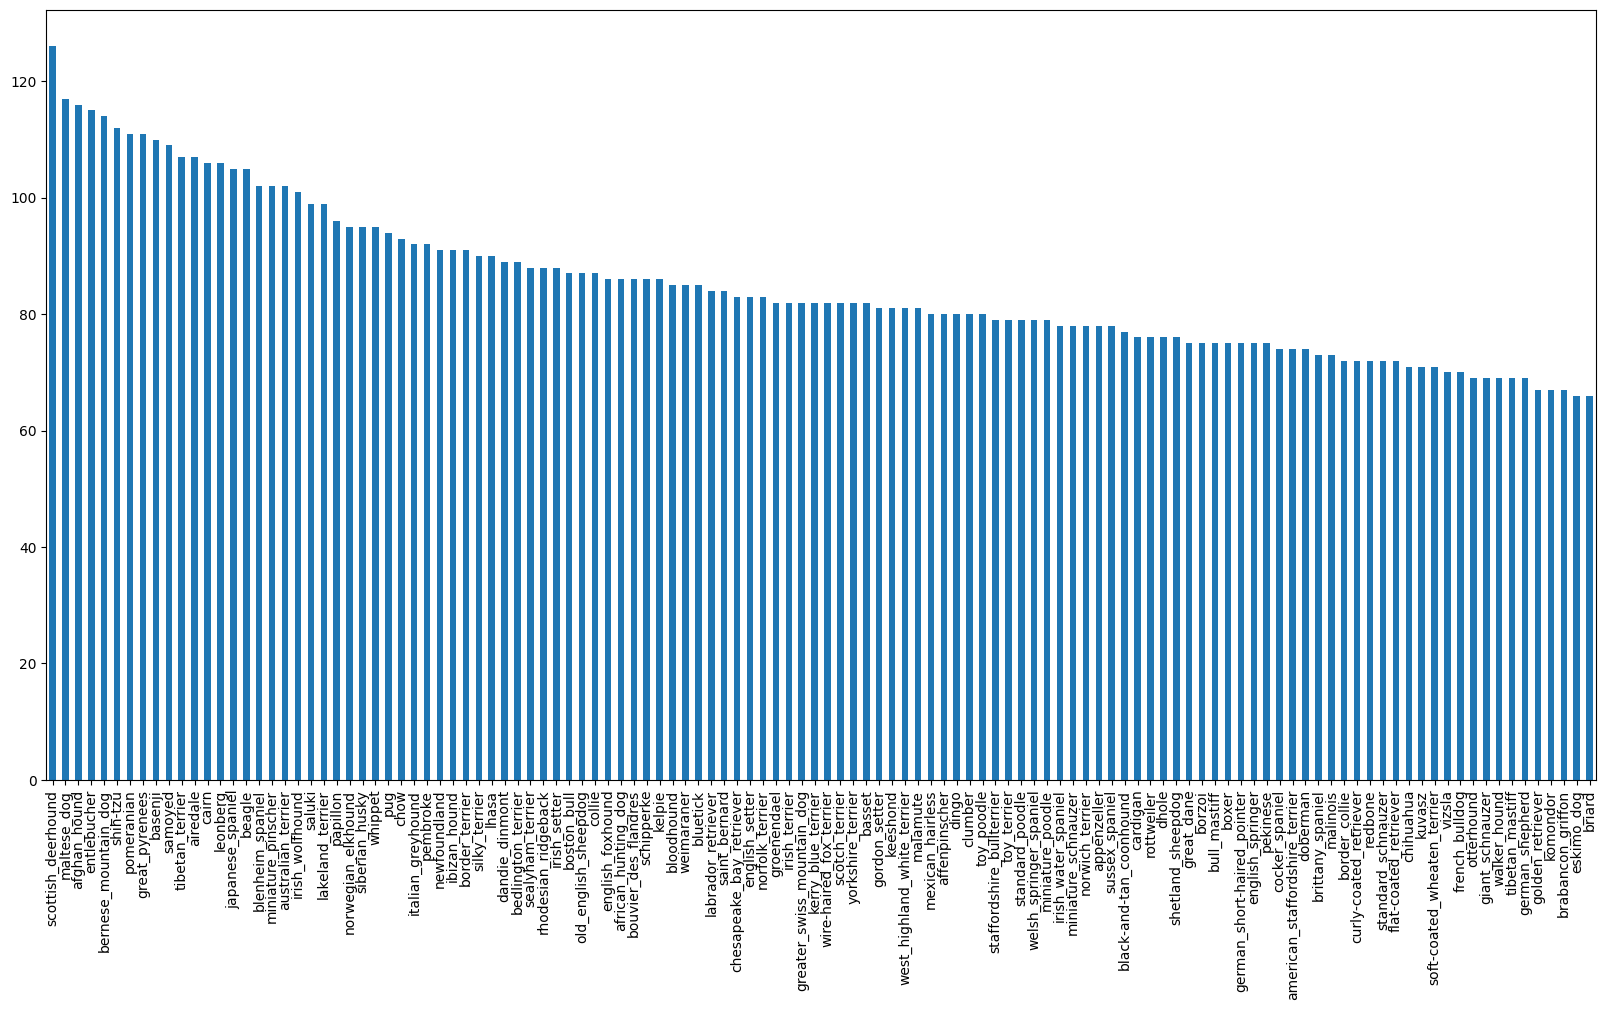

In [8]:
# find imgaes per breed
labels_csv.breed.value_counts().plot.bar(figsize=(20,10))

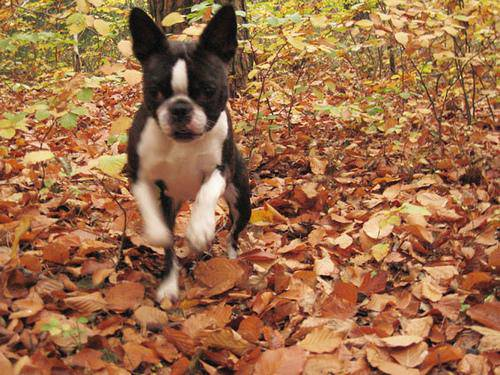

In [9]:
from IPython.display import Image
Image("drive/MyDrive/dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

Getting images and their labels
Lets get the pathnames for images


In [10]:
filenames = ["drive/MyDrive/dog vision/train/"+fname+".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/MyDrive/dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [11]:
import os

len(filenames) , len(os.listdir("drive/MyDrive/dog vision/train"))

(10222, 10222)

In [12]:
import os
if len(os.listdir("drive/MyDrive/dog vision/train")) == len(filenames):
  print("filenames match")
else:
  print("Filenames do not match")


filenames match


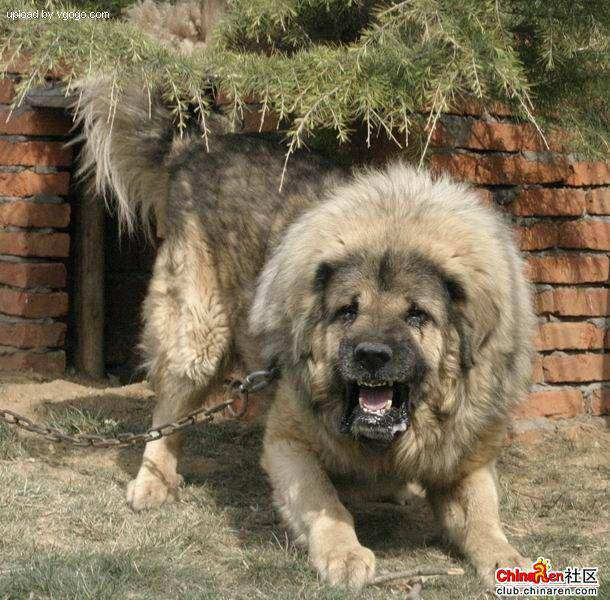

In [13]:
Image(filenames[9000])

In [14]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [15]:
#Lets prepare our labels from our training data
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [16]:
len(labels)

10222

In [17]:
len(filenames)

10222

In [18]:
if len(labels) == len(filenames):
  print("All well ,continue...")
else:
  print("check data directories as data mismatch!!")

All well ,continue...


In [19]:
unique_breeds = np.unique(labels)

In [20]:
len(unique_breeds)

120

In [21]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:1]

#Explanation of what is happenning in brackets on top

boolean_labels_test =[]
for label in labels :
      boolean_labels_test.append(label == unique_breeds)



boolean_labels_test[:1]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [22]:
#Setup the x and y variables
X = filenames
y = boolean_labels


In [23]:
NUM_IMAGES = 1000 #@ param {type:"slider", min:1000 , max:10000}

In [24]:
from sklearn.model_selection import train_test_split

X_train ,X_val , y_train, y_val = train_test_split(X[:NUM_IMAGES]
                                                   ,y[:NUM_IMAGES]
                                                   ,test_size=0.2
                                                   ,random_state =42)

len(X_train),len(X_val),X_train[:2]

(800,
 200,
 ['drive/MyDrive/dog vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/dog vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'])

#Preprocessing Images (turing images into tensors)

To prepeocess otu images , we write a function to do

1.Take an image filepath as input
2.use tensorflow to read a file and save it to a variable
3.Tuen image into tensors
4.Resize the image to be a shape of (224 , 224)
5 Return the modified image

Convert an image into numpy array

https://www.tensorflow.org/tutorials/load_data/images


array([[[114, 113, 131],
        [103, 102, 120],
        [113, 112, 130],
        ...,
        [219, 210, 177],
        [195, 186, 153],
        [235, 226, 193]],

       [[112, 111, 129],
        [107, 106, 124],
        [111, 110, 128],
        ...,
        [224, 215, 184],
        [201, 192, 161],
        [233, 224, 193]],

       [[111, 110, 128],
        [114, 113, 131],
        [108, 107, 125],
        ...,
        [215, 206, 177],
        [198, 189, 160],
        [216, 207, 178]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]], dtype=uint8)
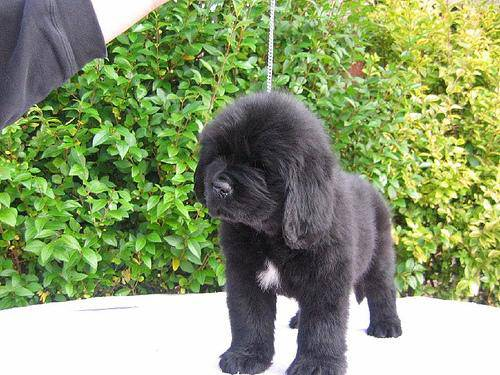

In [25]:
from matplotlib.pyplot import imread
image = imread(filenames[420])
image

In [26]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[114, 113, 131],
        [103, 102, 120],
        [113, 112, 130],
        ...,
        [219, 210, 177],
        [195, 186, 153],
        [235, 226, 193]],

       [[112, 111, 129],
        [107, 106, 124],
        [111, 110, 128],
        ...,
        [224, 215, 184],
        [201, 192, 161],
        [233, 224, 193]]], dtype=uint8)>

In [27]:
IMG_SIZE = 224

In [28]:
def process_image(image_path,im_size=IMG_SIZE):
  """
    Takes the imagepath and converts into tensors
  """

  #read an image path , save it to a variable called image
  image = tf.io.read_file(image_path)
  #turn the jpg image into tensor with 3 colour channels RGB
  image = tf.image.decode_jpeg(image,channels=3)
 # convert colour channels form 0-255 to 0-1
  image = tf.image.convert_image_dtype(image,tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])
  return image


In [29]:
#create a function to return a tuple of tensors

def get_image_label(image_path, label):

  image = process_image(image_path)
  return (image,label)


In [30]:
X[42]
tf.constant(y[42])

<tf.Tensor: shape=(120,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])>

In [31]:
#process_image(X[42],tf.constant(y[42]))

In [32]:
BATCH_SIZE = 32

#Create a funstion to turn data into batches

def create_data_batches(X,y=None,batch_size= BATCH_SIZE, valid_data= False, test_data=False):
  if test_data:
    print("Create test data batches")
    #Create tesnor flow dataset from X, only filepaths not labels
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
    #put it into batches of 32
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating validation batches with filenames and labels")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Create training data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    #shuffling images
    data = data.shuffle(buffer_size = len(X))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

In [33]:
# create training data in the form of batches of 32 , which are now tensors(not filename and label anymore)
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val,y_val,valid_data=True)

Create training data batches
Creating validation batches with filenames and labels


In [34]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [35]:
train_data


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [36]:
## Visualising Data batches


import matplotlib.pyplot as plt

def show_25_images(images,labels):
  """ Displays a plot of 25 images and labels from a ata batch"""
  plt.figure(figsize =(10,10))
  for i in range(25):
    ax= plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")


In [37]:
train_images,train_labels = next(train_data.as_numpy_iterator())
#train_images, train_labels

In [38]:
len(train_images),len(train_labels)

(32, 32)

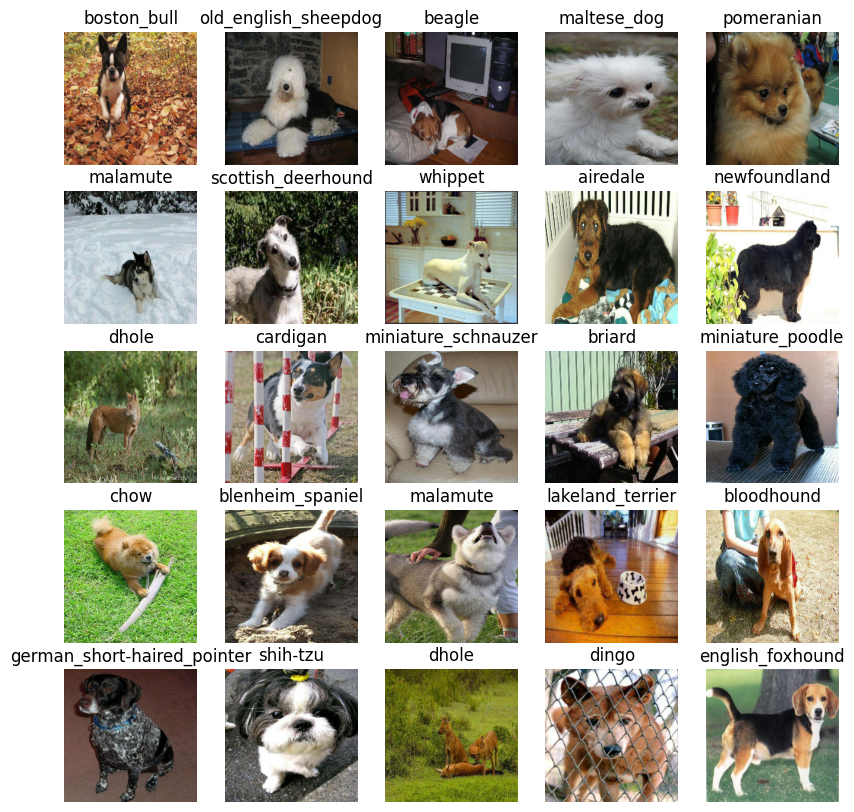

In [39]:
show_25_images(train_images, train_labels)

In [40]:
val_images,val_labels  = next(val_data.as_numpy_iterator())

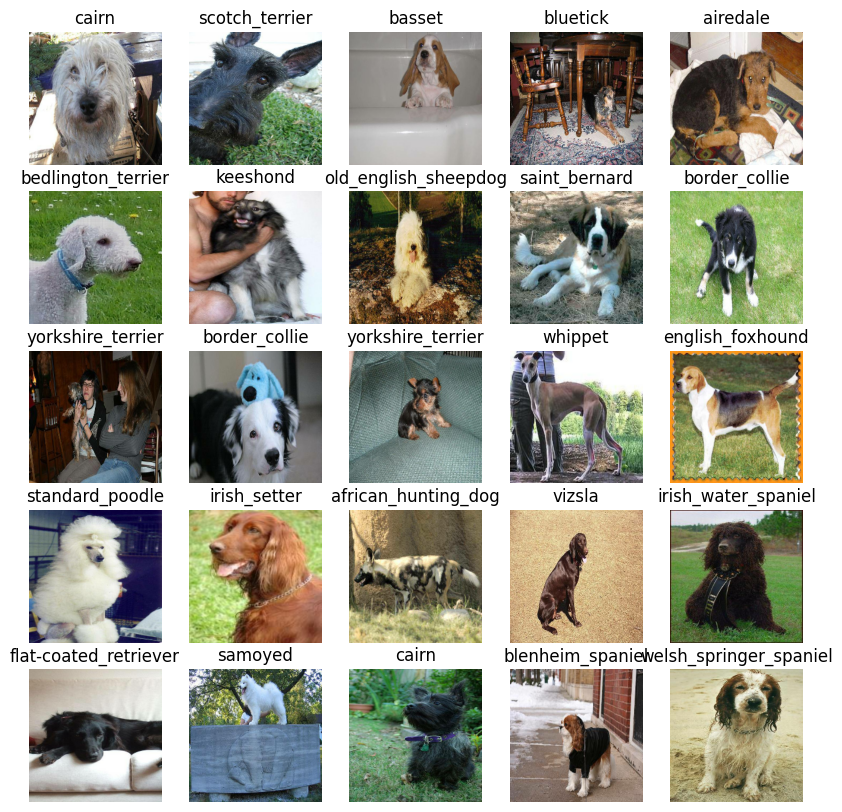

In [41]:
show_25_images(val_images, val_labels)

In [42]:
#Setup input shape to a model
#eg https://medium.com/@nutanbhogendrasharma/image-classification-model-mobilenet-v2-from-tensorflow-hub-8191b28a202a

INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE , 3] #batch , height , width , colour channel(RGB)
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
classifier_model = "mobilenet_v2"

In [43]:
import tensorflow_hub as hub
def create_model(input_shape= INPUT_SHAPE,output_shape =OUTPUT_SHAPE,model_url=MODEL_URL):
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL),
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax")])

  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

  model.build(INPUT_SHAPE)

  return model

In [44]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 3660505 (13.96 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [45]:
predictions = model.predict(val_data,verbose =1)
predictions

7/7 [==============================] - 70s 11s/step


array([[0.00256858, 0.00019116, 0.00698383, ..., 0.0002759 , 0.00138264,
        0.0034901 ],
       [0.03966732, 0.007089  , 0.00026288, ..., 0.00229716, 0.0045124 ,
        0.00042521],
       [0.00023045, 0.03696813, 0.00158003, ..., 0.00097651, 0.00359289,
        0.00256585],
       ...,
       [0.00183758, 0.0088694 , 0.01437703, ..., 0.00467721, 0.00396051,
        0.00388432],
       [0.00342139, 0.0025516 , 0.00064222, ..., 0.00172703, 0.00595229,
        0.00808418],
       [0.0055744 , 0.00045261, 0.00153599, ..., 0.00204234, 0.00416027,
        0.00045018]], dtype=float32)

In [46]:
%load_ext tensorboard
import datetime
#create a funstion to build tensor board callback

def create_tensorboard_callback():
  #create a log directory for storing tensor board logs
  logdir = os.path.join("drive/MyDrive/dog vision/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [47]:
#This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)


In [48]:
## TRaining the deep learning model, first model is going to train on 1000 images to make sure all is working fine
NUM_EPOCHS = 100 #@param {type:"slider",min:10,max:100,step:10}


In [49]:
NUM_EPOCHS

100

In [50]:
print("YESSSS "if tf.config.list_physical_devices("GPU") else "noooooo")

YESSSS 


#Create a function that trains the function

1. Create model
2. create the tensorboard callback
3. CAll and FitFailedWarning
4. return model

In [51]:
def train_model():
  """ Trains a given model and returns a trained function"""

  model= create_model()
# logging the calll
  tensorboard = create_tensorboard_callback()

#Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq =1,
            callbacks=[tensorboard,early_stopping])
  return model

In [52]:
model = train_model()

Epoch 1/100
25/25 [==============================] - 355s 14s/step - loss: 4.4517 - accuracy: 0.1050 - val_loss: 3.2385 - val_accuracy: 0.3000
Epoch 2/100
25/25 [==============================] - 4s 175ms/step - loss: 1.4710 - accuracy: 0.7175 - val_loss: 2.0638 - val_accuracy: 0.5300
Epoch 3/100
25/25 [==============================] - 5s 184ms/step - loss: 0.4969 - accuracy: 0.9475 - val_loss: 1.6356 - val_accuracy: 0.6000
Epoch 4/100
25/25 [==============================] - 4s 148ms/step - loss: 0.2269 - accuracy: 0.9900 - val_loss: 1.4953 - val_accuracy: 0.6250
Epoch 5/100
25/25 [==============================] - 5s 189ms/step - loss: 0.1323 - accuracy: 0.9975 - val_loss: 1.4310 - val_accuracy: 0.6450
Epoch 6/100
25/25 [==============================] - 4s 152ms/step - loss: 0.0916 - accuracy: 0.9987 - val_loss: 1.4024 - val_accuracy: 0.6350
Epoch 7/100
25/25 [==============================] - 4s 171ms/step - loss: 0.0691 - accuracy: 1.0000 - val_loss: 1.3787 - val_accuracy: 0.6450

In [53]:
def unbatchify(data):
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images,labels




In [54]:
def get_pred_label(prediction_probabilities):
  """ Turns an array of prediction prob into a label"""
  return unique_breeds[np.argmax(prediction_probabilities)]


In [55]:
val_images ,val_labels = unbatchify(val_data)

#Now  we ave prediction lavels and validation images and labels

#create a function which takes an array of prediction probablities , an array of truth labels and an array of integers
* convert the prediction probalitites to prediction labels
* plot the predicted label
* plt the truth label and target image

In [56]:
def plot_pred(prediction_probabilities , labels , images, n =1):
  """ View the prediction label and  image for sample n"""
  pred_prob , true_label, image = prediction_probabilities[n], labels[n] , images[n]
  pred_label = get_pred_label(pred_prob)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  if pred_label == true_label:
    colour = "green"
  else:
    colour ="red"
  plt.title("{}{:2.0f}% {}".format(pred_label,
                                     np.max(pred_prob) *100,
                                     true_label),
            color = colour)

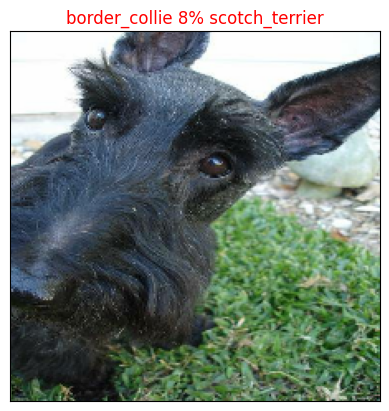

In [57]:
plot_pred(prediction_probabilities =predictions,
          labels= val_labels,
          images= val_images)

## Create a plot to show top 10 predictions

Take an input of pred prob, truth array
* find the predicted label , using get pred label
*find the top 10 prediction probability indent
*finally the prediction labels
*Then plot the top 10 predictions

In [58]:
def plot_pred_conf(prediction_prob, labels, n=1):
  """ plots the top 10 highest predicitons and maek the true ones as green"""

  pred_prob, true_label = prediction_prob[n],labels[n]

  pred_label = get_pred_label(pred_prob)

  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  top_10_pred_vals =  pred_prob[top_10_pred_indexes]

  #find top 10 labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  top_plot= plt.bar(np.arange(len(top_10_pred_labels)),
                    top_10_pred_vals,
                    color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation="vertical")


  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass


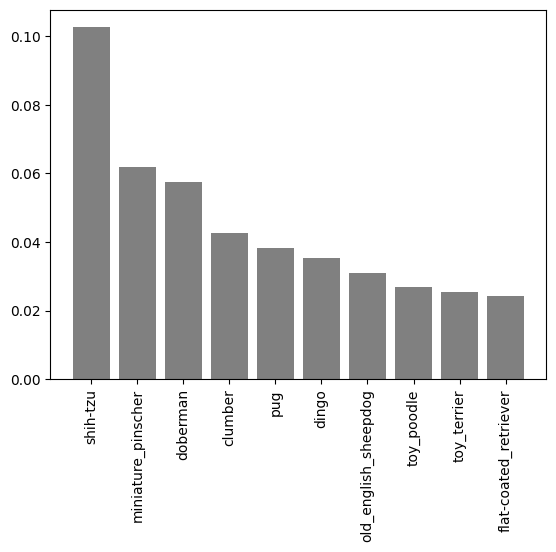

In [59]:
plot_pred_conf(prediction_prob = predictions,labels =val_labels , n=9)

In [60]:
unique_breeds[predictions[0].argsort()[-10:][::-1]]

array(['malinois', 'komondor', 'golden_retriever', 'schipperke', 'lhasa',
       'standard_poodle', 'briard', 'black-and-tan_coonhound',
       'cocker_spaniel', 'borzoi'], dtype=object)

In [61]:
predictions[0].max()

0.37151876

In [62]:
full_data = create_data_batches(X,y)

Create training data batches


In [63]:
full_model = create_model()

In [64]:
#saving and reloading a trained model
def save_model(model, suffix=None):
  model_dir = os.path.join("drive/MyDrive/dog vision/models",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = model_dir +"-"+ suffix +".h5"
  model.save(model_path)
  return model_path


In [65]:
#load the saved trained model


def load_model(model_path):
  model = tf.keras.models.load_model(model_path,
                                     custom_objects ={"KerasLayer":hub.KerasLayer})

  return model

In [66]:
# save model

save_model(model,suffix="1000-images-mobilenetv2-Adam")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/dog vision/models/20240321-16081711037286-1000-images-mobilenetv2-Adam.h5'

In [67]:
fully_loaded_model  = load_model("drive/MyDrive/dog vision/models/20240321-11561711022197-1000-images-mobilenetv2-Adam.h5")

In [68]:
model.evaluate(val_data)

7/7 [==============================] - 1s 162ms/step - loss: 1.3618 - accuracy: 0.6400


[1.3618241548538208, 0.6399999856948853]

In [69]:
#Create full data batch using the function we wrote above
full_data = create_data_batches(X,y)

Create training data batches


In [70]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [71]:
full_model = create_model()


In [72]:
# create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy",patience ="3")

Running this cell will take a while , may be upto 30 mins or longer for the first epoch , as the CPU has to load all of the images into memory.

In [73]:
NUM_EPOCHS

100

In [74]:
#fit the full model to full data

full_model.fit(x= full_data ,
               epochs = NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 4147s 13s/step - loss: 1.2743 - accuracy: 0.6780
Epoch 2/100
320/320 [==============================] - 41s 129ms/step - loss: 0.3787 - accuracy: 0.8841
Epoch 3/100
320/320 [==============================] - 42s 130ms/step - loss: 0.2194 - accuracy: 0.9380
Epoch 4/100
320/320 [==============================] - 44s 136ms/step - loss: 0.1404 - accuracy: 0.9678
Epoch 5/100
320/320 [==============================] - 42s 130ms/step - loss: 0.0964 - accuracy: 0.9818
Epoch 6/100
320/320 [==============================] - 43s 134ms/step - loss: 0.0695 - accuracy: 0.9889
Epoch 7/100
320/320 [==============================] - 43s 133ms/step - loss: 0.0544 - accuracy: 0.9920
Epoch 8/100
320/320 [==============================] - 42s 132ms/step - loss: 0.0429 - accuracy: 0.9940
Epoch 9/100
320/320 [==============================] - 42s 131ms/step - loss: 0.0337 - accuracy: 0.9965
Epoch 10/100
320/320 [==============================] - 41s 127m

TypeError: '>=' not supported between instances of 'int' and 'str'

In [ ]:
#Load test file now

test_path="drive/MyDrive/dog vision/test"
#get all of the filenames in the test_path
test_filename = [test_path + fname for fname in os.listdir(test_path)]
test_filename[:10]
len(test_filename)

In [ ]:
# Now we ll make predictions on the test data
test_data = create_data_batches(test_filename,test_data=True)

In [ ]:
len(test_data),test_data


In [ ]:
test_model_tensorboard = create_tensorboard_callback()
test_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy",patience ="3")

In [ ]:
#passing the test data now to our model trained on full data
test_predictions = fully_loaded_model.predict(test_data,verbose=1)

In [ ]:
# Trying to create the submission csv required by Kaggle


preds_df = pd.DataFrame(columns = ["id"] + list(unique_breeds))
preds_df.head()


In [ ]:
#  split_text removes the extension of the file and only takes the filename with the path so removes .jpg
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids[:10]


In [ ]:
preds_df["id"] = test_ids
preds_df.head()

In [ ]:
#Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_prediction


In [ ]:
preds_df.tocsv("drive/MyDrive/dog vision/full_model_predictions_submission1_mobilenetv2.csv",index=False)